La base de datos a usar en la experimentación será la misma del video anterior, que es la UNSW NB15. Este dataset está compuesto por 42 características y sus respectivas etiquetas, donde 0 son los paquetes normales y 1 son las amenazas. Las características se dividen en 6 grupos los cuales son:

**De flujo:** en estas se destacan los puertos de origen, destino y el protocolo de transporte. 

**Básicas:** Se destacan la duración, el servicio empleado, los tiempos de vida y los bytes empleados entre origen y destino. 

**Contenido:** entre están estas algunas como la profundidad de la conexión con el servidor y el contenido transmitido. 

**Tiempo:** en las cuales se destacan los tiempos de confirmación y los retardos. 

**Conexión:**  Se encuentra el numero de conexiones que utiliza el mismo servicio, que tiene el mismo origen o destino. 

**Adicionales:** se encuentra el numero de flujos y el método de acceso a los servicios (si inicio sesión o no). 

Moustafa, N., & Slay, J. (2015, November). UNSW-NB15: a comprehensive data set for network intrusion detection systems (UNSW-NB15 network data set). In 2015 military communications and information systems conference (MilCIS) (pp. 1-6). IEEE.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('UNSW_NB15_training-set.csv',sep=';')
df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,1.214780e-01,tcp,-,FIN,6,4,258,172,7408749.0,...,1,1,0,0,0,1,1,0,Normal,0
1,2,6.499020e-01,tcp,-,FIN,14,38,734,42014,78473372.0,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129e+06,tcp,-,FIN,8,16,364,13186,14170161.0,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642e+06,tcp,ftp,FIN,12,12,628,770,13677108.0,...,1,3,1,1,0,2,1,0,Normal,0
4,5,4.494540e-01,tcp,-,FIN,10,6,534,268,33373826.0,...,1,40,0,0,0,2,39,0,Normal,0


In [2]:
df.set_index('id',inplace=True)
df= df.loc[(df.attack_cat=='Normal') | (df.attack_cat=='DoS')]
df.tail()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
id,,,,,,,,,,,,,,,,,,,,,
174379,4.598935e+06,ospf,-,INT,82,0,5248,0,1.761277e+07,254,...,1,1,0,0,0,1,1,0,DoS,1
174899,9.597890e-01,tcp,ftp,FIN,12,12,740,728,2.396360e+07,254,...,1,1,0,0,0,1,1,0,DoS,1
175056,2.081460e-01,tcp,dns,FIN,10,12,508,7924,1.008907e+08,62,...,1,1,0,0,0,1,1,0,DoS,1
175093,1.900000e-05,udp,-,INT,2,0,106,0,5.263158e+09,254,...,1,1,0,0,0,1,1,0,DoS,1
175249,2.013791e+06,tcp,smtp,FIN,226,50,272070,3084,1.365584e+08,62,...,1,1,0,0,0,18,1,0,DoS,1


Text(0.5, 1.0, 'Cantidad tipos de paquetes')

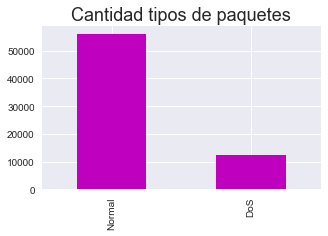

In [3]:
plt.style.use('seaborn')
df.attack_cat.value_counts().plot(kind='bar',color='m',figsize=(5,3))
plt.title('Cantidad tipos de paquetes', size=18)

In [4]:
Datos= df.loc[df.service!='-']

Text(0.5, 1.0, 'Servicio usado por tipos de paquete')

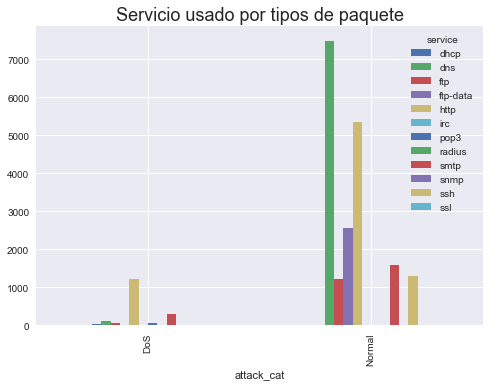

In [5]:
Datos.groupby('attack_cat').service.value_counts().unstack().plot(kind='bar')
plt.title('Servicio usado por tipos de paquete',size=18)

In [6]:
Datos=pd.concat([Datos.loc[Datos.attack_cat=='Normal'].iloc[0:200],Datos.loc[Datos.attack_cat=='DoS'].iloc[0:200]], axis=0)
Datos.attack_cat.value_counts()

DoS       200
Normal    200
Name: attack_cat, dtype: int64

In [8]:
X=Datos.iloc[:,0:42]
y=Datos.iloc[:,-1]

In [9]:
X.dtypes

dur                  float64
proto                 object
service               object
state                 object
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt                 int64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_ltm       int64
ct_dst_sport_l

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
le=LabelEncoder()
num_cols=X.select_dtypes(exclude='object').columns

transformador=ColumnTransformer([('ss',StandardScaler(),num_cols)],remainder='passthrough')

In [36]:
X['proto']=le.fit_transform(X['proto'].values)
X['service']=le.fit_transform(X['service'].values)
X['state']=le.fit_transform(X['state'].values)
X_transformado=transformador.fit_transform(X)

In [9]:
X.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
id,,,,,,,,,,,,,,,,,,,,,
4,1.681642e+06,0,2,1,12,12,628,770,1.367711e+07,62,...,2,1,1,3,1,1,0,2,1,0
12,2.093085e+06,0,6,1,62,28,56329,2212,4.252097e+07,62,...,1,1,1,2,0,0,0,1,1,0
16,2.000000e-06,1,7,2,2,0,138,0,5.000000e+09,254,...,1,1,1,4,0,0,0,2,1,0
18,3.935560e-01,0,4,1,10,8,860,1096,4.319589e+07,62,...,1,1,1,2,0,0,1,1,3,0
22,3.380170e-01,0,4,1,10,6,998,268,4.437647e+07,254,...,1,1,1,1,0,0,1,2,3,0


### Seleccion de caracteristicas

In [52]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.svm import SVC 
clf=SVC(kernel='rbf',gamma=0.5,C=1)
caracteristicas=X.columns
sfs= SFS(clf, k_features=15, forward=True, floating=False, verbose=2, scoring='accuracy', cv=4)
sfs.fit(X_transformado,y.values,custom_feature_names=caracteristicas)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:    0.4s finished

[2020-07-11 23:02:32] Features: 1/15 -- score: 0.9299999999999999[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    0.3s finished

[2020-07-11 23:02:33] Features: 2/15 -- score: 0.96[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.2s finished

[2020-07-11 23:02:33] Features: 3/15 -- score: 0.97[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    

SequentialFeatureSelector(clone_estimator=True, cv=4,
                          estimator=SVC(C=1, cache_size=200, class_weight=None,
                                        coef0=0.0,
                                        decision_function_shape='ovr', degree=3,
                                        gamma=0.5, kernel='rbf', max_iter=-1,
                                        probability=False, random_state=None,
                                        shrinking=True, tol=0.001,
                                        verbose=False),
                          fixed_features=None, floating=False, forward=True,
                          k_features=15, n_jobs=1, pre_dispatch='2*n_jobs',
                          scoring='accuracy', verbose=2)

In [54]:
sfs.subsets_

{1: {'feature_idx': (9,),
  'cv_scores': array([0.72, 1.  , 1.  , 1.  ]),
  'avg_score': 0.9299999999999999,
  'feature_names': ('sttl',)},
 2: {'feature_idx': (9, 30),
  'cv_scores': array([0.84, 1.  , 1.  , 1.  ]),
  'avg_score': 0.96,
  'feature_names': ('sttl', 'ct_srv_src')},
 3: {'feature_idx': (9, 15, 30),
  'cv_scores': array([0.88, 1.  , 1.  , 1.  ]),
  'avg_score': 0.97,
  'feature_names': ('sttl', 'sinpkt', 'ct_srv_src')},
 4: {'feature_idx': (9, 15, 16, 30),
  'cv_scores': array([0.88, 1.  , 1.  , 1.  ]),
  'avg_score': 0.97,
  'feature_names': ('sttl', 'sinpkt', 'dinpkt', 'ct_srv_src')},
 5: {'feature_idx': (9, 15, 16, 30, 36),
  'cv_scores': array([0.9 , 1.  , 1.  , 0.99]),
  'avg_score': 0.9724999999999999,
  'feature_names': ('sttl', 'sinpkt', 'dinpkt', 'ct_srv_src', 'is_ftp_login')},
 6: {'feature_idx': (9, 15, 16, 30, 36, 40),
  'cv_scores': array([0.91, 1.  , 0.99, 0.99]),
  'avg_score': 0.9725000000000001,
  'feature_names': ('sttl',
   'sinpkt',
   'dinpkt',
   'ct

### Estimacion de caracteristicas

In [11]:
dataset_estimado= X[['dur','trans_depth','response_body_len','tcprtt','is_ftp_login','is_sm_ips_ports',
                    'ct_dst_ltm','ct_src_ltm','ct_src_dport_ltm','ct_dst_sport_ltm']]
dataset_estimado.head()

,dur,trans_depth,response_body_len,tcprtt,is_ftp_login,is_sm_ips_ports,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm
id,,,,,,,,,,
4,1.681642e+06,0,0,0.000000,1,0,2,2,1,1
12,2.093085e+06,0,0,0.131140,0,0,1,1,1,1
16,2.000000e-06,0,0,0.000000,0,0,1,2,1,1
18,3.935560e-01,1,103,0.120313,0,0,1,1,1,1
22,3.380170e-01,1,0,0.154433,0,0,1,2,1,1


In [12]:
#Separacion de los datos de entrenamiento y prueba usando kfold cross validation
from sklearn.model_selection import KFold
kf=KFold(n_splits=4, shuffle= True)
for train_index,test_index in kf.split(dataset_estimado.values):
    estimado_train=dataset_estimado.values[train_index]
    estimado_test=dataset_estimado.values[test_index]
    y_train=y.values[train_index]
    y_test=y.values[test_index]
print(f'estimado_train shape{estimado_train.shape}')
print(f'estimado_test shape{estimado_test.shape}')
print(f'y_train shape{y_train.shape}')
print(f'y_test shape{y_test.shape}')

estimado_train shape(225, 10)
estimado_test shape(75, 10)
y_train shape(225,)
y_test shape(75,)


In [14]:
from sklearn.preprocessing import StandardScaler
normalizador= StandardScaler()
estimadotrain_norm=normalizador.fit_transform(estimado_train)
estimadotest_norm=normalizador.transform(estimado_test)
estimadotrain_norm.mean(axis=0), estimadotest_norm.mean(axis=0)

(array([ 8.19097876e-17,  7.30280034e-17, -1.22124533e-17, -1.97372982e-17,
        -8.38835174e-18,  0.00000000e+00,  2.61519201e-16, -4.88498131e-17,
        -1.31746466e-16,  5.08975578e-16]),
 array([-0.09221313, -0.12489053, -0.11209138, -0.17705307,  0.04735137,
         0.        ,  0.01188974,  0.04222655,  0.07547116,  0.03121192]))

In [15]:
estimadotrain_norm.std(axis=0), estimadotest_norm.std(axis=0)

(array([1., 1., 1., 1., 1., 0., 1., 1., 1., 1.]),
 array([0.7558772 , 1.00278143, 0.02987544, 0.97591553, 1.22199572,
        0.        , 0.95872414, 0.97515548, 1.27748177, 0.87588241]))

**Classificador**

In [16]:
from sklearn.svm import SVC
from sklearn import metrics
clasificador_svm=SVC(C=1,gamma=0.5,kernel='rbf')
clasificador_svm.fit(estimadotrain_norm,y_train)
y_pred=clasificador_svm.predict(estimadotest_norm)
acc=metrics.accuracy_score(y_test,y_pred)
print(f'Precision con caracteristicas Estimadas {acc}')

Precision con caracteristicas Estimadas 0.8266666666666667


### Extraccion de caracteristicas

In [17]:
##Aplicacion de PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=5)
extraido_train=pca.fit_transform(estimadotrain_norm)
extraido_test=pca.transform(estimadotest_norm)

In [19]:
##clasificacion 
clasificador_svm.fit(extraido_train,y_train)
y_pred=clasificador_svm.predict(extraido_test)
acc=metrics.accuracy_score(y_test,y_pred)
print(f'Precision con caracteristicas Extraidas {acc}')

Precision con caracteristicas Extraidas 0.8


### Caracteristicas estimadas y extraidas

In [21]:
#combinacion de los datasets
combinado_train=np.hstack((estimadotrain_norm,extraido_train))
combinado_test=np.hstack((estimadotest_norm,extraido_test))
#Clasificacion con el dataset combinado
clasificador_svm.fit(combinado_train,y_train)
y_pred=clasificador_svm.predict(combinado_test)
acc=metrics.accuracy_score(y_test,y_pred)
print(f'La precision con los datasets concatenados es {acc}')

La precision con los datasets concatenados es 0.8266666666666667


### SEQUENTIAL FORWARD SELECTION